In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
cat4 = cv2.imread('/kaggle/input/cats-dogs-customdataset/CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

In [3]:
type(cat4)

numpy.ndarray

In [4]:
cat4.shape

(375, 500, 3)

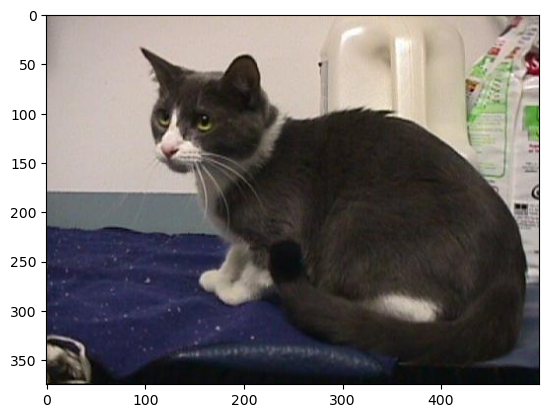

In [5]:
plt.imshow(cat4)

In [6]:
dog2 = cv2.imread('/kaggle/input/cats-dogs-customdataset/CATS_DOGS/train/DOG/2.jpg')
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

In [7]:
dog2.shape

(199, 188, 3)

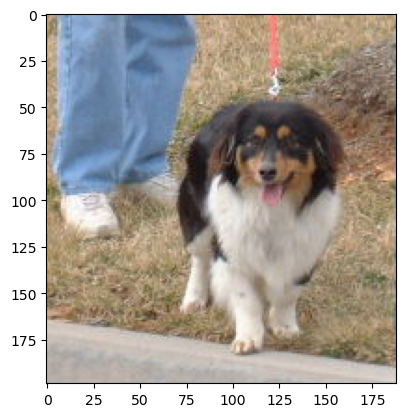

In [8]:
plt.imshow(dog2)

## Preparing the data for the model

In [9]:
#Image manipulation
from keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [10]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

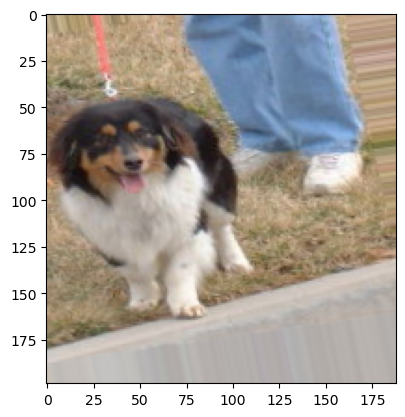

In [11]:
plt.imshow(image_gen.random_transform(dog2))

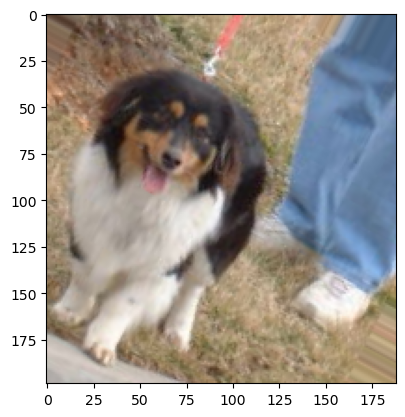

In [12]:
plt.imshow(image_gen.random_transform(dog2))

In [13]:
image_gen.flow_from_directory('/kaggle/input/cats-dogs-customdataset/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [14]:
image_gen.flow_from_directory('/kaggle/input/cats-dogs-customdataset/CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


In [15]:
#Resizing images
# width,height,channels
image_shape = (150,150,3)

# Creating the CNN model

In [16]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [17]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, binary classification, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

# Training the model

In [19]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('/kaggle/input/cats-dogs-customdataset/CATS_DOGS/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [20]:
test_image_gen = image_gen.flow_from_directory('/kaggle/input/cats-dogs-customdataset/CATS_DOGS/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [21]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/100
150/150 [==============================] - 47s 230ms/step - loss: 0.6939 - accuracy: 0.5196 - val_loss: 0.6901 - val_accuracy: 0.5417
Epoch 2/100
150/150 [==============================] - 33s 217ms/step - loss: 0.6835 - accuracy: 0.5675 - val_loss: 0.6916 - val_accuracy: 0.5052
Epoch 3/100
150/150 [==============================] - 32s 211ms/step - loss: 0.6695 - accuracy: 0.5729 - val_loss: 0.6929 - val_accuracy: 0.4792
Epoch 4/100
150/150 [==============================] - 29s 191ms/step - loss: 0.6900 - accuracy: 0.5429 - val_loss: 0.6611 - val_accuracy: 0.5990
Epoch 5/100
150/150 [==============================] - 27s 182ms/step - loss: 0.6675 - accuracy: 0.5950 - val_loss: 0.6437 - val_accuracy: 0.6302
Epoch 6/100
150/150 [==============================] - 27s 180ms/step - loss: 0.6606 - accuracy: 0.6050 - val_loss: 0.6426 - val_accuracy: 0.6146
Epoch 7/100
150/150 [==============================] - 26s 174ms/step - loss: 0.6318 - accuracy: 0.6333 - val_loss: 0.6286 -

## Evaluating the model

In [24]:
results.history['accuracy']

[0.5195833444595337,
 0.5674999952316284,
 0.5729166865348816,
 0.5429166555404663,
 0.5950000286102295,
 0.6050000190734863,
 0.6333333253860474,
 0.6308333277702332,
 0.6549999713897705,
 0.6612499952316284,
 0.6600000262260437,
 0.6558333039283752,
 0.6675000190734863,
 0.6804684400558472,
 0.6883333325386047,
 0.7024999856948853,
 0.6846507787704468,
 0.6958333253860474,
 0.6829778552055359,
 0.6875,
 0.7141666412353516,
 0.7179166674613953,
 0.7116666436195374,
 0.7149999737739563,
 0.7225000262260437,
 0.7404166460037231,
 0.7450000047683716,
 0.7275000214576721,
 0.7395833134651184,
 0.7316666841506958,
 0.7300000190734863,
 0.7391666769981384,
 0.7516666650772095,
 0.7308333516120911,
 0.7316666841506958,
 0.7649999856948853,
 0.7540777921676636,
 0.7537500262260437,
 0.7541666626930237,
 0.7645833492279053,
 0.7469677925109863,
 0.7762500047683716,
 0.7674999833106995,
 0.753333330154419,
 0.7762500047683716,
 0.7758333086967468,
 0.7728983759880066,
 0.7758333086967468,
 0.78

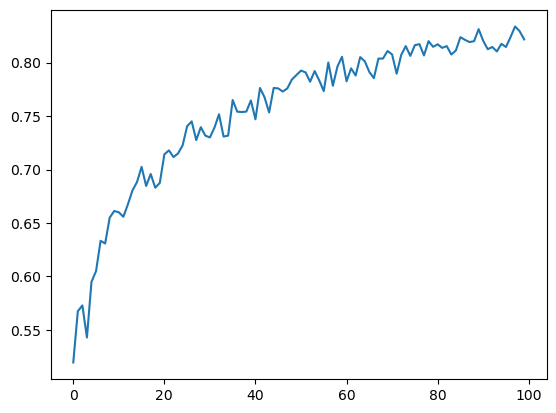

In [25]:
plt.plot(results.history['accuracy'])

## Predicting new images

In [26]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

dog_file = '/kaggle/input/cats-dogs-customdataset/CATS_DOGS/train/DOG/2.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [28]:
prediction_prob = model.predict(dog_img)

1/1 [==============================] - 0s 247ms/step


In [29]:
# Output prediction
print(f'Probability that image is a dog is: {prediction_prob} ')

Probability that image is a dog is: [[0.8878442]] 
